In [40]:
# %matplotlib notebook
%matplotlib inline 
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from tqdm import tqdm
import time


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = 16
import seaborn as sns
# sns.set_style("white")

import warnings
warnings.filterwarnings("ignore")


# My packages
from source import parse_mxml as pm
from source import log_representation as lr
from source import plots as plts
from source import drift_detection as dd
from source import drift_localization as dl
from source import offline_streaming_clustering as off_sc
from source import Markov_Association_Drift_Detection as MARDD

import sklearn
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import hdbscan
from sklearn.base import clone as sk_clone 
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.decomposition import PCA, TruncatedSVD
import ruptures as rpt
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# import rpy2
# from rpy2.robjects.packages import importr
# utils = importr('utils')
# utils.install_packages('bcp')

import random
random.seed(42)

import os
import glob

import gc
gc.enable()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)

print('The scikit-learn version is {}.'.format(sklearn.__version__))
# import sys
# print(sys.path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The scikit-learn version is 0.24.2.


In [41]:
def insensitive_glob(pattern):
    def either(c):
        return '[%s%s]' % (c.lower(), c.upper()) if c.isalpha() else c
    return glob.glob(''.join(map(either, pattern)))

def if_any(string, lista):
    for l in lista:
        if l in string:
            return True
    return False

In [42]:
logs = insensitive_glob("../../../../../../../Datasets/Business_Process_Drift_Logs/Logs/*/*k.*")#MXML")

In [43]:
logs = [x for x in logs if "2.5" not in x]

In [44]:
pd.DataFrame(logs)

,0
0,../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cb\cb10k.mxml
1,../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cb\cb5k.mxml
2,../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cb\cb7.5k.mxml
3,../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cd\cd10k.mxml
4,../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cd\cd5k.MXML
5,../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cd\cd7.5k.MXML
6,../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cf\cf10k.mxml
7,../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cf\cf5k.mxml
8,../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cf\cf7.5k.mxml
9,../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cm\cm10k.mxml


### Read and Prep log file

In [177]:
log = logs[0]
print(log)
log_read = pm.all_prep(log)
tokens = lr.get_traces_as_tokens(log_read)
y_true = list(range(int(len(tokens)/10), len(tokens), int(len(tokens)/10)))
print(len(tokens))
print(len(tokens.unique()))

../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cb\cb10k.mxml
10000
84


In [178]:
tokens[500]

'Loan__application_received Check__application__form_completeness Appraise_property Check_credit_history Assess_loan_risk Assess_eligibility Prepare_acceptance_pack Check_if_home_insurance_quote_is_requested Send_home_insurance_quote Verify_repayment_agreement Approve_application Loan__application_approved'

In [179]:
tokens[750]

'Loan__application_received Check__application__form_completeness Check_credit_history Assess_loan_risk Appraise_property Assess_eligibility Prepare_acceptance_pack Check_if_home_insurance_quote_is_requested Send_acceptance_pack Verify_repayment_agreement Cancel_application Loan__application_canceled'

In [180]:
df = pd.DataFrame(tokens.str.split()).explode('Activity').rename(columns={"Activity": "From"})
print(df.nunique())
df["From"].value_counts()

From    19
dtype: int64


Check__application__form_completeness         11077
Appraise_property                             10000
Assess_loan_risk                              10000
Assess_eligibility                            10000
Check_credit_history                          10000
Loan__application_received                    10000
Verify_repayment_agreement                     5028
Reject_application                             4972
Loan_application_rejected                      4972
Check_if_home_insurance_quote_is_requested     3717
Prepare_acceptance_pack                        3717
Approve_application                            2560
Loan__application_approved                     2560
Send_home_insurance_quote                      2514
Send_acceptance_pack                           2514
Cancel_application                             2468
Loan__application_canceled                     2468
Receive_updated_application                    1077
Return_application_back_to_applicant           1077
Name: From, 

### Trace Clustering

In [181]:
# from sequential_pattern_mining import ERMiner
# model = ERMiner(minsup=DEFAULT_PARAMS['minsup'],
#                     minconf=DEFAULT_PARAMS['minconf'],
#                     single_consequent=False)

# model.fit(data)
# print("{} valid rules found.".format(len(model.valid_rules)))
# model.rules_to_df(args.outpath)

In [182]:

# "activity_binary": lr.get_binary_representation,
# "activity_frequency": lr.get_frequency_representation,

# "transitions_binary": lr.get_binary_transitions_representation,
# "transitions_frequency": lr.get_frequency_transitions_representation,

# "activity_tfidf": lr.get_tfidf_representation,
# "transitions_tfidf": lr.get_tfidf_transitions_representation,

# "activity_transitions_frequency": lr.get_activity_transitions_frequency_representation,
# "activity_transitions_binary": lr.get_activity_transitions_binary_representation

# "association_rules_representation": lr.get_association_rules_representation
# "get_sequential_rules_representation": lr.get_sequential_rules_representation
# "get_transition_matrix_representation": lr.get_transition_matrix_representation


In [183]:
clustering_window_size=250
sliding_step = 0
representation = lr.get_activity_transitions_frequency_representation
distance = 'cosine'
distance_list=['cosine']#['euclidean', 'hamming','cityblock', 'cosine']

In [195]:
df1 = lr.get_transition_matrix_representation(tokens[800:1000])
df1

support  \
antecedents                                consequents                                            
Appraise_property                          Appraise_property                           0.000000   
                                           Approve_application                         0.000000   
                                           Assess_eligibility                          0.023198   
                                           Assess_loan_risk                            0.019743   
                                           Cancel_application                          0.000000   
                                           Check__application__form_completeness       0.000000   
                                           Check_credit_history                        0.055775   
                                           Check_if_home_insurance_quote_is_requested  0.000000   
                                           Loan__application_approved                  0.000000   
                                           Loan__application_canceled                  0.000000   
                                           Loan_application_rejected                   0.000000   
                                           Prepare_acceptance_pack                     0.000000   
                                           Receive_updated_application                 0.000000   
                                           Reject_application                          0.000000   
                                           Return_application_back_to_applicant        0.000000   
                                           Send_acceptance_pack                        0.000000   
                                           Send_home_insurance_quote                   0.000000   
                                           Verify_repayment_agreement                  0.000000   
                                           end_node                                    0.000000   
Approve_application                        Appraise_property                           0.000000   
                                           Approve_application                         0.000000   
                                           Assess_eligibility                          0.000000   
                                           Assess_loan_risk                            0.000000   
                                           Cancel_application                          0.000000   
                                           Check__application__form_completeness       0.000000   
                                           Check_credit_history                        0.000000   
                                           Check_if_home_insurance_quote_is_requested  0.000000   
                                           Loan__application_approved                  0.021718   
                                           Loan__application_canceled                  0.000000   
                                           Loan_application_rejected                   0.000000   
                                           Prepare_acceptance_pack                     0.000000   
                                           Receive_updated_application                 0.000000   
                                           Reject_application                          0.000000   
                                           Return_application_back_to_applicant        0.000000   
                                           Send_acceptance_pack                        0.000000   
                                           Send_home_insurance_quote                   0.000000   
                                           Verify_repayment_agreement                  0.000000   
                                           end_node                                    0.000000   
Assess_eligibility                         Appraise_property                           0.000000   
                             

In [196]:
df2 = lr.get_transition_matrix_representation(tokens[1000:1200])
df2

support  \
antecedents                                consequents                                            
Appraise_property                          Appraise_property                           0.000000   
                                           Approve_application                         0.000000   
                                           Assess_eligibility                          0.023058   
                                           Assess_loan_risk                            0.026065   
                                           Cancel_application                          0.000000   
                                           Check__application__form_completeness       0.000000   
                                           Check_credit_history                        0.051128   
                                           Check_if_home_insurance_quote_is_requested  0.000000   
                                           Loan__application_approved                  0.000000   
                                           Loan__application_canceled                  0.000000   
                                           Loan_application_rejected                   0.000000   
                                           Prepare_acceptance_pack                     0.000000   
                                           Receive_updated_application                 0.000000   
                                           Reject_application                          0.000000   
                                           Return_application_back_to_applicant        0.000000   
                                           Send_acceptance_pack                        0.000000   
                                           Send_home_insurance_quote                   0.000000   
                                           Verify_repayment_agreement                  0.000000   
                                           end_node                                    0.000000   
Approve_application                        Appraise_property                           0.000000   
                                           Approve_application                         0.000000   
                                           Assess_eligibility                          0.000000   
                                           Assess_loan_risk                            0.000000   
                                           Cancel_application                          0.000000   
                                           Check__application__form_completeness       0.000000   
                                           Check_credit_history                        0.000000   
                                           Check_if_home_insurance_quote_is_requested  0.000000   
                                           Loan__application_approved                  0.031579   
                                           Loan__application_canceled                  0.000000   
                                           Loan_application_rejected                   0.000000   
                                           Prepare_acceptance_pack                     0.000000   
                                           Receive_updated_application                 0.000000   
                                           Reject_application                          0.000000   
                                           Return_application_back_to_applicant        0.000000   
                                           Send_acceptance_pack                        0.000000   
                                           Send_home_insurance_quote                   0.000000   
                                           Verify_repayment_agreement                  0.000000   
                                           end_node                                    0.000000   
Assess_eligibility                         Appraise_property                           0.000000   
                             

In [197]:
difference = df1.subtract(df2, fill_value=0)
difference

support  \
antecedents                                consequents                                            
Appraise_property                          Appraise_property                           0.000000   
                                           Approve_application                         0.000000   
                                           Assess_eligibility                          0.000141   
                                           Assess_loan_risk                           -0.006322   
                                           Cancel_application                          0.000000   
                                           Check__application__form_completeness       0.000000   
                                           Check_credit_history                        0.004647   
                                           Check_if_home_insurance_quote_is_requested  0.000000   
                                           Loan__application_approved                  0.000000   
                                           Loan__application_canceled                  0.000000   
                                           Loan_application_rejected                   0.000000   
                                           Prepare_acceptance_pack                     0.000000   
                                           Receive_updated_application                 0.000000   
                                           Reject_application                          0.000000   
                                           Return_application_back_to_applicant        0.000000   
                                           Send_acceptance_pack                        0.000000   
                                           Send_home_insurance_quote                   0.000000   
                                           Verify_repayment_agreement                  0.000000   
                                           end_node                                    0.000000   
Approve_application                        Appraise_property                           0.000000   
                                           Approve_application                         0.000000   
                                           Assess_eligibility                          0.000000   
                                           Assess_loan_risk                            0.000000   
                                           Cancel_application                          0.000000   
                                           Check__application__form_completeness       0.000000   
                                           Check_credit_history                        0.000000   
                                           Check_if_home_insurance_quote_is_requested  0.000000   
                                           Loan__application_approved                 -0.009861   
                                           Loan__application_canceled                  0.000000   
                                           Loan_application_rejected                   0.000000   
                                           Prepare_acceptance_pack                     0.000000   
                                           Receive_updated_application                 0.000000   
                                           Reject_application                          0.000000   
                                           Return_application_back_to_applicant        0.000000   
                                           Send_acceptance_pack                        0.000000   
                                           Send_home_insurance_quote                   0.000000   
                                           Verify_repayment_agreement                  0.000000   
                                           end_node                                    0.000000   
Assess_eligibility                         Appraise_property                           0.000000   
                             

In [203]:
abs(difference).sum()

support                  0.201935
antecedents support      2.201608
consequents support      2.201608
confidence               1.268429
lift                   106.418257
leverage                 0.371323
conviction               6.224219
dtype: float64

In [188]:
# from scipy.stats import entropy
# df = pd.DataFrame(lr.get_transition_matrix_representation(tokens[0:250]),columns=["Prob"]).reset_index()
# dist1 = df.loc[df['From'] == "Appraise_property"]["Prob"]
# dist1.hist()
# plt.show()

# df2 = pd.DataFrame(lr.get_transition_matrix_representation(tokens[250:500]),columns=["Prob"]).reset_index()
# dist2 = df2.loc[df2['From'] == "Appraise_property"]["Prob"]
# dist2.hist()
# plt.show()

# df3 = pd.DataFrame(lr.get_transition_matrix_representation(tokens[1000:1250]),columns=["Prob"]).reset_index()
# dist3 = df3.loc[df3['From'] == "Appraise_property"]["Prob"]
# dist3.hist()
# plt.show()

# print(pd.Series(entropy([dist1, dist2], base=2)).sum(skipna=None))
# print(pd.Series(entropy([dist2, dist3], base=2)).sum(skipna=None))

In [189]:
# df = lr.get_association_rules_representation(tokens[0:250])
# df
# # df[df['antecedents'] == 'Assess_eligibility']

In [210]:
from scipy import stats
diff_agg = []
diff_sum = []
representation_comp = pd.DataFrame()

if sliding_step>0:
    loop = range(0, len(tokens) - clustering_window_size + 1, sliding_step)
else:
    loop = range(0, len(tokens), clustering_window_size)
        
for i in loop:
#     print("iteration:",i)
    representation = lr.get_transition_matrix_representation(tokens[i:i+clustering_window_size])
    
    if representation_comp.shape[0] > 0:
        difference = representation.subtract(representation_comp, fill_value=0)
#         difference.plot(use_index=False)
#         print(abs(difference).sum())
        diff_sum.append(abs(difference).sum())
#         print(abs(difference).max())
        diff_agg.append(abs(difference).max())
#         print(np.count_nonzero(difference))
    
    representation_comp = representation
    
#     representation.replace([np.inf, -np.inf], 0).plot()
#     representation.replace([np.inf, -np.inf], 0).cumsum().plot(use_index=False)
#     lr.get_association_rules_representation(tokens[i:i+clustering_window_size]).replace([np.inf, -np.inf], 0).sum(axis=1).sort_values().plot(use_index=False)
#     lr.get_association_rules_representation(tokens[i:i+clustering_window_size]).replace([np.inf, -np.inf], 0)['conviction'].plot()
#     print(np.count_nonzero(lr.get_association_rules_representation(tokens[i:i+clustering_window_size]).replace([np.inf, -np.inf], 0)['conviction']))
#     lr.get_association_rules_representation(tokens[i:i+clustering_window_size]) \
#         ['conviction'].replace([np.inf, -np.inf], 0).sort_values().plot(use_index=False)
#     print(representation.shape)
#     plt.show()
    

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013F404DD348>,
      dtype=object)

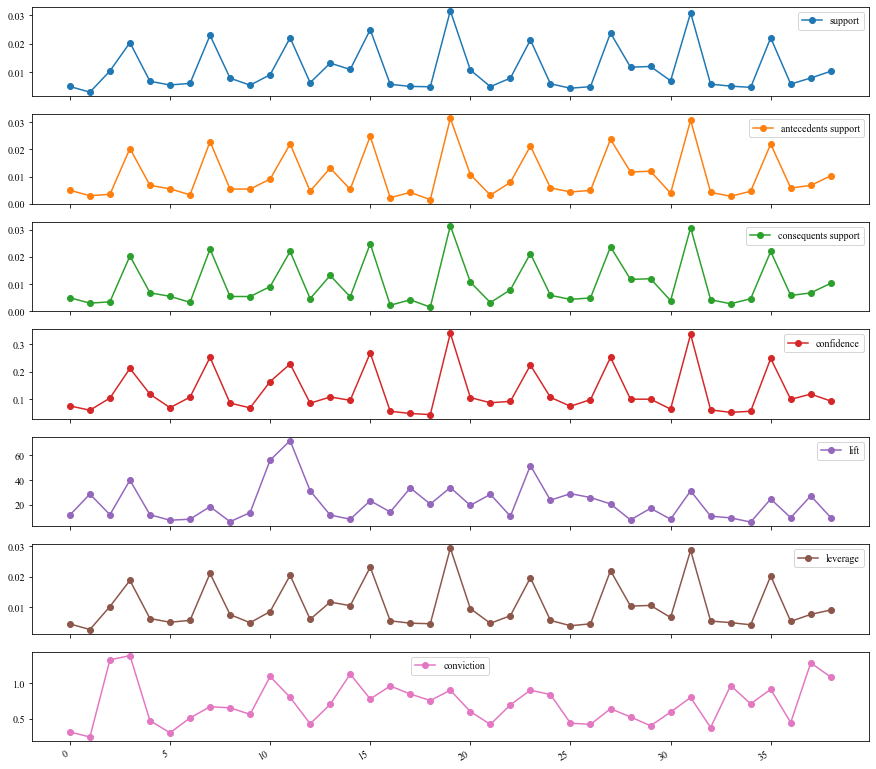

In [211]:
pd.DataFrame(diff_agg).rolling(window=1).mean().plot(figsize=(15,15), subplots=True, marker='o')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013F61743448>,
      dtype=object)

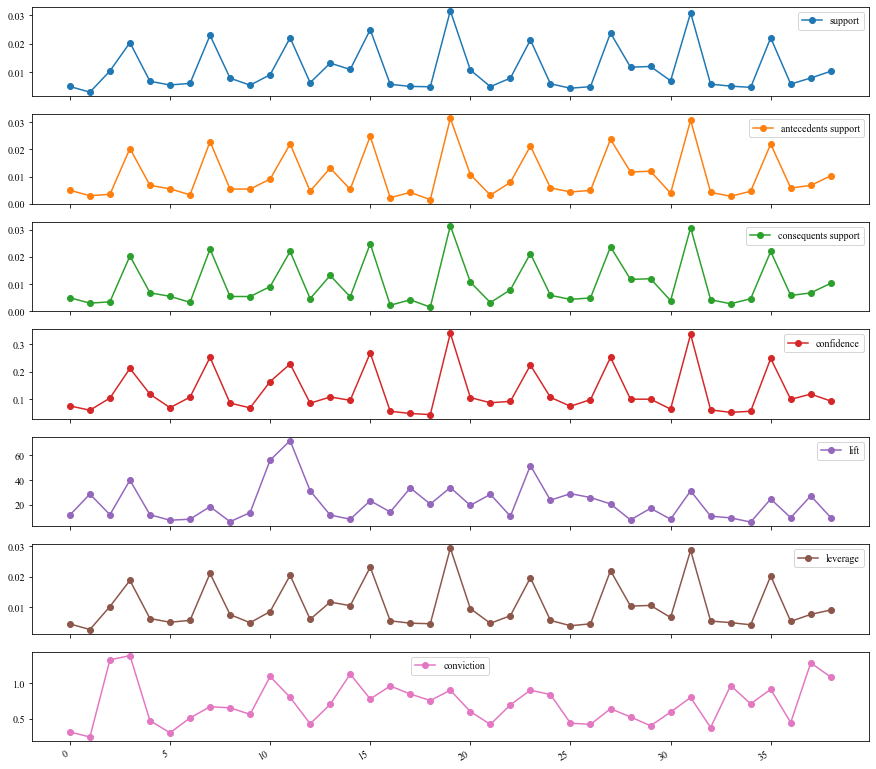

In [212]:
pd.DataFrame(diff_agg).rolling(window=1).mean().plot(figsize=(15,15), subplots=True, marker='o')

In [213]:
from scipy import stats
diff_agg = []
diff_sum = []
representation_comp = pd.DataFrame()
if sliding_step>0:
    loop = range(0, len(tokens) - clustering_window_size + 1, sliding_step)
else:
    loop = range(0, len(tokens), clustering_window_size)
        
for i in loop:
#     print("iteration:",i)
    representation = lr.get_association_rules_representation(tokens[i:i+clustering_window_size])
    
    if representation_comp.shape[0] > 0:
        difference = representation.subtract(representation_comp, fill_value=0)
#         difference.plot(use_index=False)
#         print(abs(difference).sum())
        diff_sum.append(abs(difference).sum())
#         print(abs(difference).max())
        diff_agg.append(abs(difference).max())
#         print(np.count_nonzero(difference))
    
    representation_comp = representation


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013F49DD5408>,
      dtype=object)

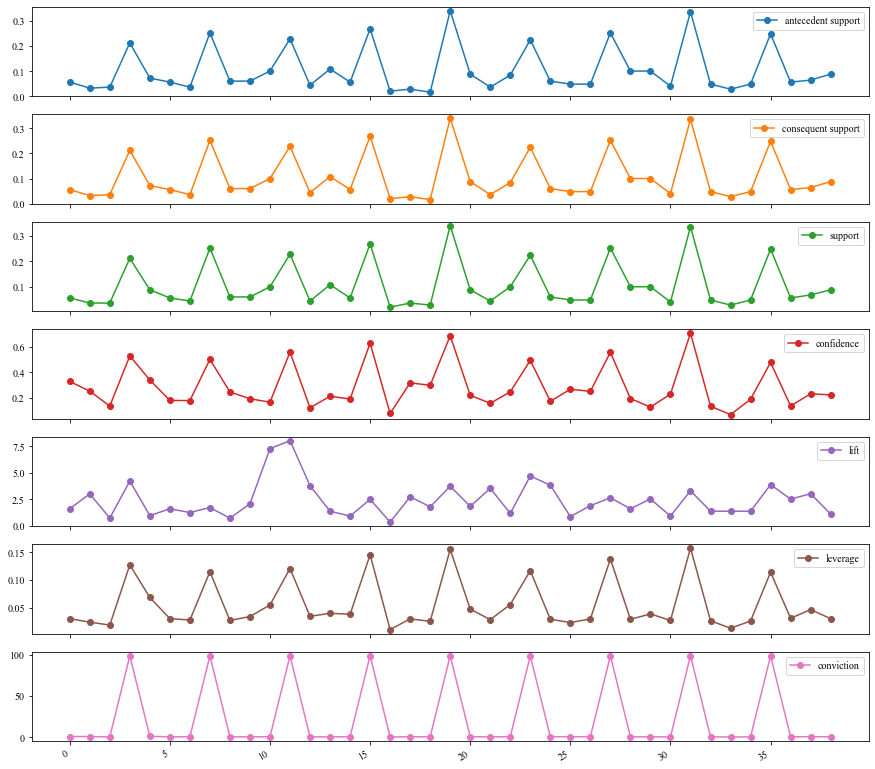

In [214]:
pd.DataFrame(diff_agg).rolling(window=1).mean().plot(figsize=(15,15), subplots=True, marker='o')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013F5B138A88>,
      dtype=object)

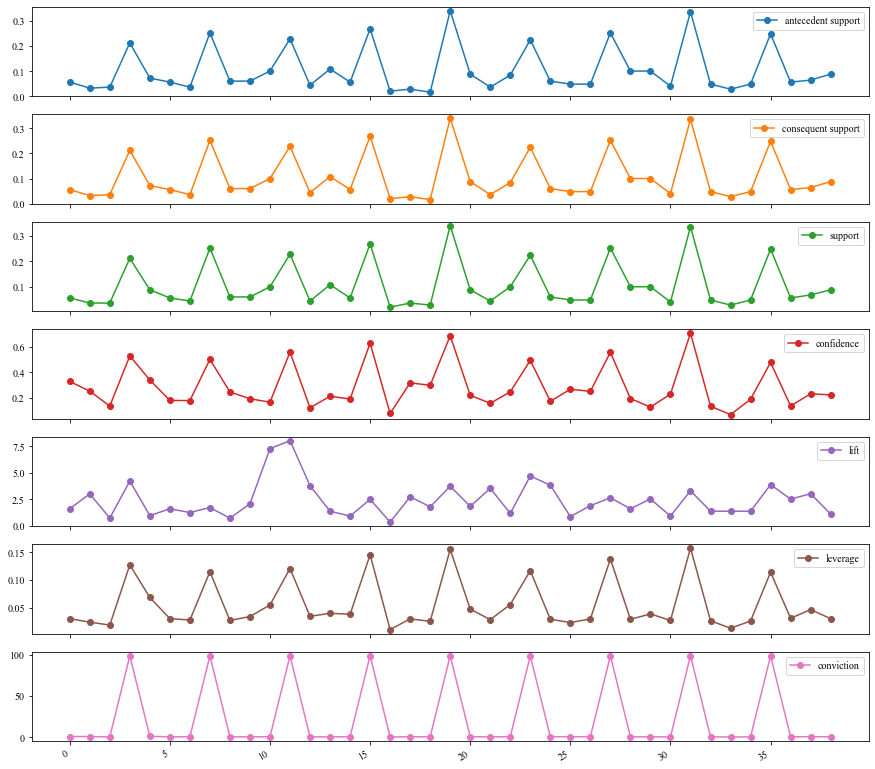

In [215]:
pd.DataFrame(diff_agg).rolling(window=1).mean().plot(figsize=(15,15), subplots=True, marker='o')

In [31]:
# # change point detection
# window=1
# model_cpd = "rbf"  # "l1","l2", "rbf", "linear", "normal", "ar"
# signals = pd.DataFrame(diff_sum).rolling(window=window).mean().dropna()#.fillna(0)

# #Window, Pelt, Binseg
# # algo = rpt.Binseg(model=model_cpd, min_size=1, jump=1).fit(signals)
# # algo = rpt.Pelt(model=model_cpd, min_size=3, jump=1).fit(signals)
# algo = rpt.Window(model=model_cpd, width=4, min_size=1, jump=1).fit(signals)
# my_bkps = algo.predict(pen=0)[:-1]  #n_bkps=None, pen=None, epsilon=None
# print("y_pred: ",my_bkps)

# # show results
# # total_size = len(run_df[metric])+(clustering_window_size/sliding_step)-1
# # new_y_true = list(range(int(total_size/10), int(total_size), int(total_size/10)))
# new_y_true = [int((x/clustering_window_size)-window) for x in y_true]

# print("y_true: ",new_y_true)
# rpt.display(signal=signals
#             , true_chg_pts=new_y_true
#             , computed_chg_pts=my_bkps
#             , figsize=(10, 4))
# plt.show()

In [32]:
# dimensionality_reduction = LocallyLinearEmbedding(
#                     n_neighbors= int(clustering_window_size-1)
#                     , n_components=3
#                     , reg=0.001
#                     , eigen_solver='auto' #{'auto', 'arpack', 'dense'}
#                     , tol=1e-06
#                     , max_iter=500
#                     , method='ltsa' #('standard', 'hessian', 'modified' or 'ltsa')
#                     , hessian_tol=0.0001
#                     , modified_tol=1e-12
#                     , neighbors_algorithm='auto' #['auto'|'brute'|'kd_tree'|'ball_tree']
#                     , random_state=42)
dimensionality_reduction = None

In [33]:
# model= hdbscan.HDBSCAN(metric=distance
#                     , gen_min_span_tree=True
# #                     , allow_single_cluster=True
# #                     , cluster_selection_method='leaf'
#                     , min_cluster_size= int(clustering_window_size*0.1)
#                     , min_samples= int(clustering_window_size*0.2)
#                     , cluster_selection_epsilon=0.25
# #                     , alpha=0.5
#                     , algorithm="generic"
#                   )
model = AgglomerativeClustering(n_clusters = 2
                                , affinity = distance
                                , linkage = 'single' #{‘ward’, ‘complete’, ‘average’, ‘single’}
                                , distance_threshold = None
                                , compute_distances = True
                               )

# model = OPTICS(
#     min_samples=0.1,
#     max_eps=2,
#     metric=distance,
#     cluster_method='xi',
#     xi=0.05,
#     predecessor_correction=True,
#     min_cluster_size=0.1,
#     algorithm='auto',
#     leaf_size=30,
# )
# model = DBSCAN(eps=0.6, min_samples=3, metric=distance)
# model=KMeans(n_clusters=1, random_state=42)

# model = GaussianMixture(n_components=2, random_state=42)
# model = BayesianGaussianMixture(n_components=4
#                                 , max_iter=1000
#                                 , n_init=1
#                                 , random_state=42)

In [ ]:
run_df, X = off_sc.run_offline_clustering_window(
    tokens,
    representation,
    dimensionality_reduction,
    model,
    distance_list,
    clustering_window_size,
#     sliding_window=False,
    sliding_step=sliding_step
)

In [ ]:
run_df

In [ ]:
for i in run_df.columns:
    print(i)
    try:
        run_df[i].plot(figsize=(16,4),subplots=True, marker='o')
        plts.plot_drift_vertical_lines(len(tokens), label="True drift")
        plt.legend()
        plt.show()
    except:
        pass

In [ ]:
cmap='Set1'
edgecolor='k'
s=50
alpha=0.3

    
for i in X.index.levels[0]:
    print("Iteration: ", i)
    
    fig = plt.figure(figsize=(5,5))
    
    if len(X.columns) == 1:
        ax = fig.add_subplot(111)
        scatter = ax.scatter(
                np.zeros(len(X.loc[[i]])), X.loc[[i]].iloc[:,0].values 
                , c=run_df.loc[[i]]['y_pred'].iloc[0]
                , cmap=cmap, edgecolor=edgecolor, s=s, alpha =alpha)
        
    elif len(X.columns) == 2:
        ax = fig.add_subplot(111)
        scatter = ax.scatter(
                X.loc[[i]].iloc[:,0].values, X.loc[[i]].iloc[:,1].values 
                , c=run_df.loc[[i]]['y_pred'].iloc[0]
                , cmap=cmap, edgecolor=edgecolor, s=s, alpha =alpha)
        
    else:
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(
                X.loc[[i]].iloc[:,0].values, X.loc[[i]].iloc[:,1].values, X.loc[[i]].iloc[:,2].values
                , c=run_df.loc[[i]]['y_pred'].iloc[0]
                , cmap=cmap, edgecolor=edgecolor, s=s, alpha =alpha)
        
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    plt.show()

### Drift Detection

In [ ]:
margin_error = 2
log_size = len(tokens)

In [ ]:
# metric = ['inter_dist_euclidean_mean', 'validity_index', 'dist_intra_cluster_list_mean']
# model_cpd = "rbf"  # "l1","l2", "rbf", "linear", "normal", "ar"
# for i in range(8,len(run_df),1):
#     print("########Rodada:", i)
#     signals = run_df[metric].iloc[i-8:i]
#     algo = rpt.Window(model=model_cpd, width=4, min_size=3, jump=1).fit(signals)
#     my_bkps = algo.predict(pen=0)[:-1]  #n_bkps=None, pen=None, epsilon=None
#     print("y_pred: ",my_bkps)
    
#     rpt.display(signal=signals
#                 , true_chg_pts=[4]
#                 , computed_chg_pts=my_bkps
#                 , figsize=(10, 4))
#     plt.show()

In [ ]:
# change point detection
window=4
metric = ['inter_dist_cosine_mean']
model_cpd = "rbf"  # "l1","l2", "rbf", "linear", "normal", "ar"
signals = run_df[metric].rolling(window=window).mean().dropna()#.fillna(0)

#Window, Pelt, Binseg
# algo = rpt.Binseg(model=model_cpd, min_size=1, jump=1).fit(signals)
# algo = rpt.Pelt(model=model_cpd, min_size=3, jump=1).fit(signals)
algo = rpt.Window(model=model_cpd, width=4, min_size=2, jump=1).fit(signals)
my_bkps = algo.predict(pen=0)[:-1]  #n_bkps=None, pen=None, epsilon=None
print("y_pred: ",my_bkps)

# show results
# total_size = len(run_df[metric])+(clustering_window_size/sliding_step)-1
# new_y_true = list(range(int(total_size/10), int(total_size), int(total_size/10)))
new_y_true = [int((x/clustering_window_size)-window) for x in y_true]

print("y_true: ",new_y_true)
rpt.display(signal=signals
            , true_chg_pts=new_y_true
            , computed_chg_pts=my_bkps
            , figsize=(10, 4))
plt.show()

In [ ]:
run_df[metric].plot(figsize=(10, 4))
run_df[metric].rolling(window=3).mean().plot(figsize=(10, 4))
run_df[metric].rolling(window=3).apply(lambda x: (x.iloc[1] - x.iloc[0])/x.iloc[0]).plot(figsize=(10, 4))

In [ ]:
# metric = "inter_dist_euclidean_mean"

# drifts, not_drifts, info = dd.detect_concept_drift(
#     run_df,
#     metric,
#     rolling_window=4,
#     std_tolerance=0,
#     min_tol=0.025,
#     verbose=False
# )

In [ ]:
# dd.get_metrics(
#     drifts
#     ,not_drifts
#     , y_true
#     , clustering_window_size
#     , sliding_step
#     , log_size
#     , margin_error
# )

In [ ]:
# plts.plot_deteccao_drift(
#     run_df,
#     metric,
#     drifts,
#     y_true,
#     info['means'],
#     info['lowers'],
#     info['uppers'],
#     save_png=""
# )

In [ ]:
metric = "inter_dist_cosine_mean"

drifts1, not_drifts1, info1 = dd.detect_concept_drift(
    run_df,
    metric,
    rolling_window=3,
    std_tolerance=2.5,
    min_tol=0.05,
    verbose=False
)
print(dd.get_metrics(
    drifts1
    , not_drifts1
    , y_true
    , clustering_window_size
    , sliding_step
    , log_size
    , margin_error
))

plts.plot_deteccao_drift(
    run_df,
    metric,
    drifts1,
    y_true,
    info1['means'],
    info1['lowers'],
    info1['uppers'],
    save_png=""
)


In [ ]:
metric = "dist_intra_cluster_list_mean"

drifts2, not_drifts2, info2 = dd.detect_concept_drift(
    run_df,
    metric,
    rolling_window=4,
    std_tolerance=2,
    min_tol=0.05,
    verbose=False
)

print(dd.get_metrics(
    drifts2
    , not_drifts2
    , y_true
    , clustering_window_size
    , sliding_step
    , log_size
    , margin_error
))

plts.plot_deteccao_drift(
    run_df,
    metric,
    drifts2,
    y_true,
    info2['means'],
    info2['lowers'],
    info2['uppers'],
    save_png=""
)

In [ ]:
metric = "calinski_harabasz_score"

drifts3, not_drifts3, info3 = dd.detect_concept_drift(
    run_df,
    metric,
    rolling_window=4,
    std_tolerance=2,
    min_tol=0.05,
    verbose=False
)

print(dd.get_metrics(
    drifts3
    , not_drifts3
    , y_true
    , clustering_window_size
    , sliding_step
    , log_size
    , margin_error
))

plts.plot_deteccao_drift(
    run_df,
    metric,
    drifts3,
    y_true,
    info3['means'],
    info3['lowers'],
    info3['uppers'],
    save_png=""
)

In [ ]:
print(drifts1)
print(drifts2)
print(drifts3)
print(y_true)

In [ ]:
def __combineDetections(comb_Drifts_Found, log_size, window_size, margin_error_weights, score_threshold=None):
    
    # Create df with all windows reference for log
    windows = pd.DataFrame(range(window_size, log_size+window_size, window_size), columns=['init'])
    windows['end'] = windows['init'] + window_size-1
    windows.reset_index(inplace=True)

    # Add drift detections and not drift detections as y_pred. If didn't test a window fill with -1
    for index, item in enumerate(comb_Drifts_Found):
        windows['y_pred'+str(index)] = [1 if window in item else 0 for window in windows['init']]
        
        # Add detections inside margin of error, but based on arg weights
        for index2, item2 in enumerate(margin_error_weights):
            windows['y_pred'+str(index)+'shift'+str(index2+1)] = \
            windows['y_pred'+str(index)].shift((index2+1)*-1).fillna(0)*(item2)
    
    # Sum all detections as a score (as a voting)
    windows['score'] = windows[list(windows.filter(regex='y_pred'))].sum(axis=1)
    
    # Remove scores lower than a threshold 
    #(if not specified, we filter scores with at least one detection in window and another detection inside one margin of error)
    if score_threshold:
        windows = windows[windows['score']>=score_threshold].reset_index(drop=True)
    else:
        windows = windows[windows['score']>=1+margin_error_weights[0]].reset_index(drop=True)

    ### Because margin of errro, we need to choose only the greater score drift in sequences
    ranks_iter = 0
    windows['rank'] = 0
    windows['index_diff'] = windows['index'].shift(-1) - windows['index'] 
    for index, row in windows.iterrows():
        if (row['index_diff'] <= len(margin_error_weights) ):
                windows.loc[index, 'rank'] = ranks_iter
        else:
            windows.loc[index, 'rank'] = ranks_iter
            ranks_iter += 1   
    
#     print('pre_groupby', windows)
    windows = windows.sort_values(['rank','score'], ascending=[1,0]).groupby('rank').head(1)
#     print('pos_groupby', windows)
#     print('result final:', list(windows['init']))
    return list(windows['init'])

In [ ]:
comb_Drifts_Found = [drifts1] + [drifts2] + [drifts3]
margin_error_weights = [0.8, 0.4]
    
# Call function that combine detections among metrics in combination and call get_metrics
comb_Drifts_Found = __combineDetections(comb_Drifts_Found
                                      , log_size
                                      , clustering_window_size
                                      , margin_error_weights
#                                       , score_threshold=1.6
                                     )
print('comb_Drifts_Found:', comb_Drifts_Found)

In [ ]:
# # Create df with all windows reference for log
# windows = pd.DataFrame(range(clustering_window_size, log_size+clustering_window_size, clustering_window_size), columns=['init'])
# windows['end'] = windows['init'] + clustering_window_size-1
# windows.reset_index(inplace=True)

# # Add drift detections and not drift detections as y_pred. If didn't test a window fill with -1
# windows['y_pred1'] = [1 if window in drifts1 else 0 for window in windows['init']]
# windows['y_pred2'] = [1 if window in drifts2 else 0 for window in windows['init']]
# windows['y_pred3'] = [1 if window in drifts3 else 0 for window in windows['init']]

# # Create a score for voting
# windows['score'] = (windows['y_pred1'] + windows['y_pred2'] + windows['y_pred3']
#                     + windows['y_pred1'].shift(-1).fillna(0)*0.8 + windows['y_pred1'].shift(-2).fillna(0)*0.5
#                     + windows['y_pred2'].shift(-1).fillna(0)*0.8 + windows['y_pred2'].shift(-2).fillna(0)*0.5
#                     + windows['y_pred3'].shift(-1).fillna(0)*0.8 + windows['y_pred3'].shift(-2).fillna(0)*0.5
#                    )
   
# windows = windows[windows['score']>=1.8].reset_index(drop=True)

# ### Choose only the greater score drift in sequences
# windows['index_next1'] = windows['index'].shift(-1)
# windows['index_next2'] = windows['index'].shift(-2)
# ranks_iter = 1
# windows['rank'] = 0
# for index, row in windows.iterrows():
#     if index > 0:
#         if ((row['index']+1 == row['index_next1']) | (row['index']+2 == row['index_next2'])):
#             windows.loc[index, 'rank'] = ranks_iter
#         else:
#             windows.loc[index, 'rank'] = ranks_iter
#             ranks_iter += 1

# windows = windows[windows.groupby('rank')['score'].transform(max) == windows['score']]

# drifts_final = list(windows['init'])
# drifts_final

In [ ]:
not_drifts = []
# start_time = time.time()
dd.get_metrics(
    comb_Drifts_Found
    ,not_drifts
    , y_true
    , clustering_window_size
    , log_size
    , margin_error
)
# print("--- %s seconds ---" % (time.time() - start_time))

### Drift Localization

In [ ]:
y_true

In [ ]:
run_df

In [ ]:
dl.localize_drift(
    run_df.centroids.loc[450], 
    run_df.centroids.loc[600], 
    X.columns
)

In [ ]:
# Result of drift localization in the ground truth drifts

dl.localize_all_drifts(
    run_df,
    [x + clustering_window_size for x in y_true], 
    clustering_window_size,
    X.columns
)

In [ ]:
# Result of drift localization in all predicted drifts

dl.localize_all_drifts(
    run_df,
    drifts, 
    clustering_window_size,
    activity_binary.columns
)

In [ ]:
# tsne = TSNE(n_components=2, perplexity=20, n_iter=1000, metric=distance, random_state=42)#, init="PCA"
# tsne_results = tsne.fit_transform(X.loc[[0]])

# df_subset['tsne-2d-one'] = tsne_results[:,0]
# df_subset['tsne-2d-two'] = tsne_results[:,1]
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne-2d-one"
#     , y="tsne-2d-two"
#     ,c = 
# #     ,hue=run_df['y_pred'].iloc[0]
#     ,palette=sns.color_palette("hls", 10)
#     ,data=df_subset
#     ,legend="full"
#     ,alpha=0.3
# )

In [ ]:
# tsne = TSNE(n_components=3
#             , perplexity=10
#             , n_iter=2000
#             , metric=distance
#             , n_iter_without_progress=300
#             , init ='random'
#             , random_state=42)
# tsne_results = tsne.fit_transform(X.loc[[0]])

# fig = plt.figure(figsize=(16,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(tsne_results[:,0],tsne_results[:,1],tsne_results[:,2], 
#             c=run_df['y_pred'].iloc[0], cmap='Set1',
#             edgecolor='k', s=100, alpha = 0.5)

# legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
# plt.show()

In [ ]:
# transformer = TSNE(n_components=2
#             , perplexity=30.0
#             , early_exaggeration=12.0
#             , learning_rate=200.0
#             , n_iter=1000
#             , n_iter_without_progress=300
#             , min_grad_norm=1e-07
#             , metric=distance
#             , init='random'
#             , verbose=0
#             , method='barnes_hut'
#             , angle=0.5
#             , random_state=42)


# transformer = PCA(n_components=10)
# transformer_results = transformer.fit_transform(X.loc[[0]])
# # Variancia de cada componente
# pca_explained_variance_temp = transformer.explained_variance_ratio_
# # Variancia de cada componente acumulado
# pca_explained_variance_cumsum_temp =  pd.DataFrame(np.cumsum(pca_explained_variance_temp))
# print(pca_explained_variance_cumsum_temp)
# # Visualização da soma acumulativa da variancia explicada por cada componente
# plt.figure()
# plt.plot(pca_explained_variance_cumsum_temp)
# plt.xlabel('Number of Components')
# plt.ylabel('Variance (%)') #for each component
# plt.title('Explained Variance')
# plt.show()

# fig = plt.figure(figsize=(16,10))
# ax = fig.add_subplot(111)
# # scatter = ax.scatter(X.loc[[0]].iloc[:,0].values, X.loc[[0]].iloc[:,1].values, 
# scatter = ax.scatter(transformer_results[:,0],transformer_results[:,1], 
#             c=run_df['y_pred'].iloc[0], cmap='Set1',
#             edgecolor='k', s=100, alpha = 0.5)
# legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
# plt.show()

############################################################
Log: ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cb\cb10k.mxml
Measure:  confidence_ass_markov
Metrics: 0.7058823529411765
Drifts_Found [1000, 2000, 4000, 4500, 5000, 7000, 8000, 8750]
Correct_Predictions [1000, 2000, 4000, 5000, 7000, 8000]


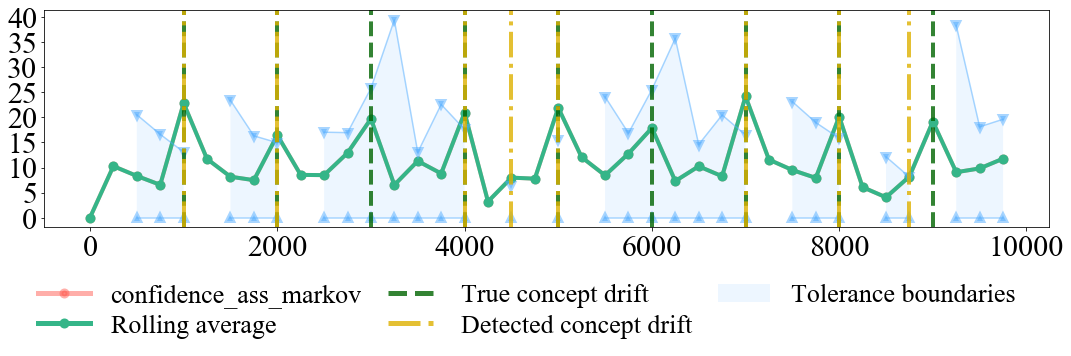

############################################################
Log: ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cb\cb5k.mxml
Measure:  confidence_ass_markov
Metrics: 1.0
Drifts_Found [1000, 1500, 3500, 4000, 4500]
Correct_Predictions [4500]


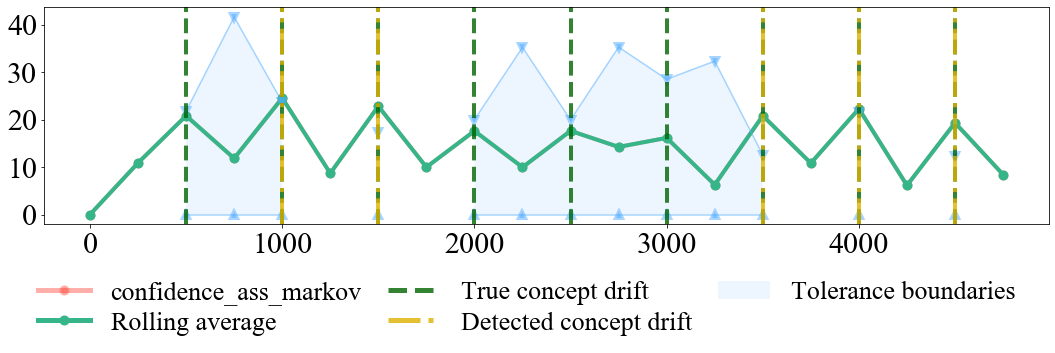

############################################################
Log: ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cb\cb7.5k.mxml
Measure:  confidence_ass_markov
Metrics: 0.8
Drifts_Found [750, 2250, 3000, 3750, 6000, 6750]
Correct_Predictions [750, 2250, 3000, 3750, 6000, 6750]


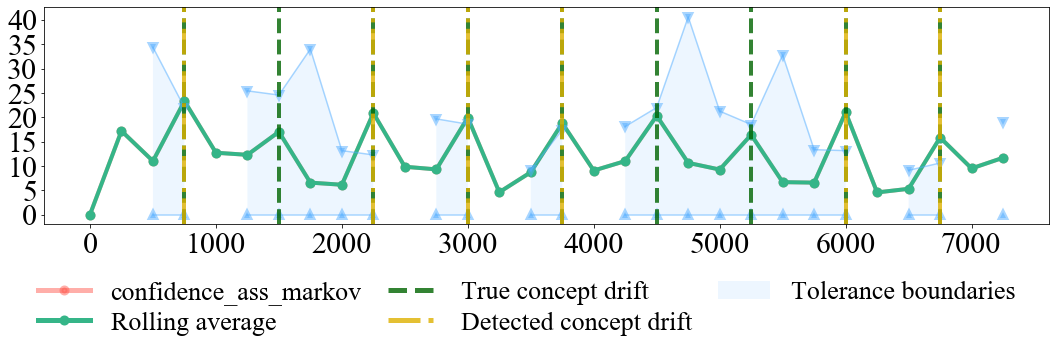

############################################################
Log: ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cd\cd10k.mxml
Measure:  confidence_ass_markov
Metrics: 0.15384615384615383
Drifts_Found [1000, 4500, 5750, 8750]
Correct_Predictions [1000]


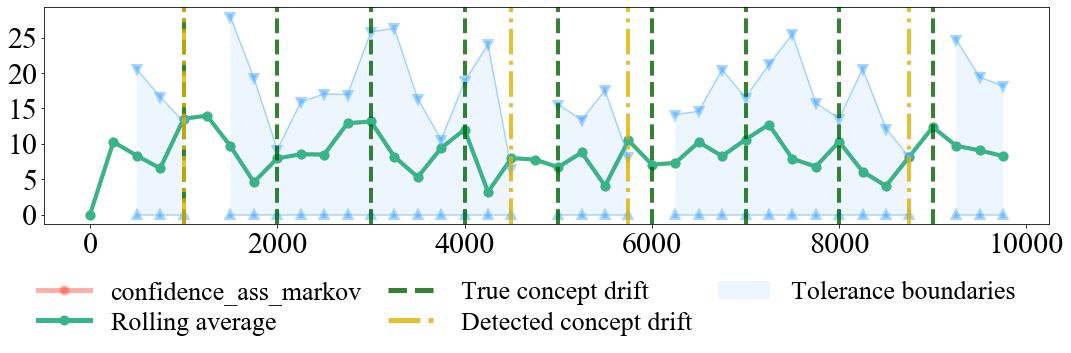

############################################################
Log: ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cd\cd5k.MXML
Measure:  confidence_ass_markov
Metrics: 0
Drifts_Found []
Correct_Predictions [0, 0, 0, 0, 0, 0, 0, 0, 0]


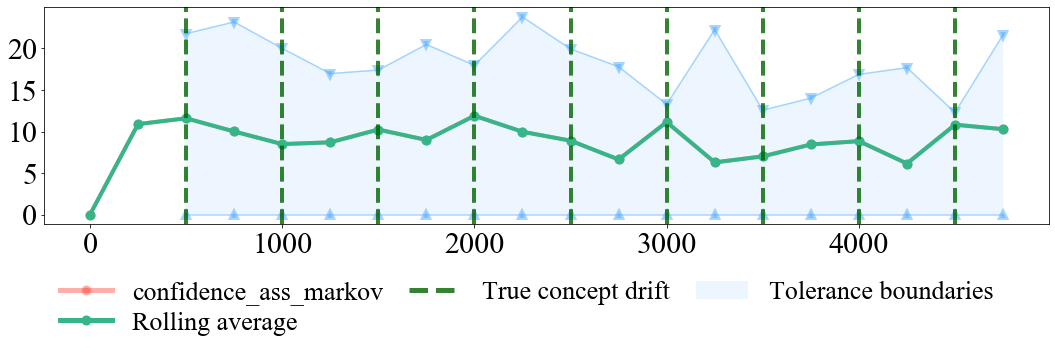

############################################################
Log: ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cd\cd7.5k.MXML
Measure:  confidence_ass_markov
Metrics: 1.0
Drifts_Found [750, 1500, 2250, 3000, 3750, 4500, 5250, 6000, 6750]
Correct_Predictions [750, 1500, 2250, 3000, 3750, 4500, 5250, 6000, 6750]


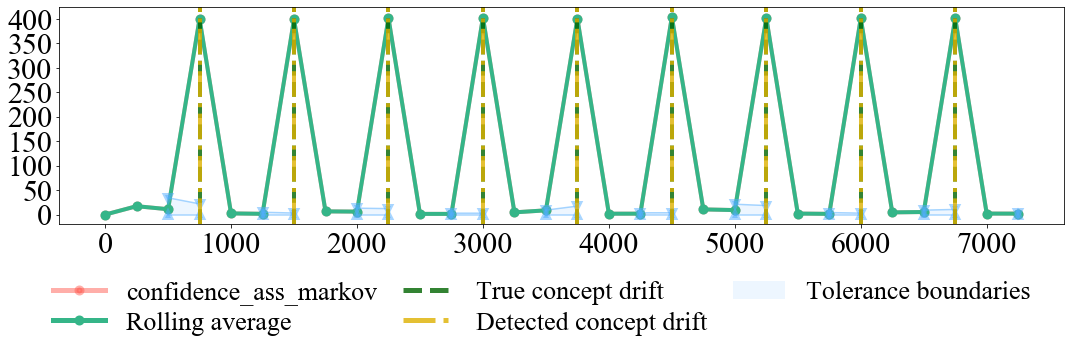

############################################################
Log: ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cf\cf10k.mxml


In [ ]:
for log in logs:
    print("############################################################")
    print("Log:", log)
    
    log_read = pm.all_prep(log)
    tokens = lr.get_traces_as_tokens(log_read)
    log_size = len(tokens)
    y_true = list(range(int(log_size/10), log_size, int(log_size/10)))
    window_size = 250
    sliding_step = 0
    margin_error = 0

    result = MARDD.run_window_measures(
        sequences = tokens
        , window_size = window_size
        , sliding_step = sliding_step
    )
#     print(result)
    
    for measure in ["confidence_ass_markov"]:#confidence_ass_markov, "conviction_ass_markov", "conviction_trans_prob", "conviction_ass_rules"]: #result:
#     measure = "conviction_ass_markov"
        print("Measure: ", measure)
        drifts, not_drifts, info = MARDD.detect_concept_drift(
            result,
            measure,
            rolling_window=1,
            std_tolerance=100,
            min_tol=1,
            verbose=False
        )
        metrics = MARDD.get_metrics(
            drifts
            , not_drifts
            , y_true
            , window_size
            , sliding_step
            , log_size
            , margin_error
        )
        print("Metrics:", metrics['F1'])
        print("Drifts_Found", metrics['Drifts_Found'])
        print("Correct_Predictions", metrics['Correct_Predictions'])

        plts.plot_deteccao_drift(
            result,
            measure,
            drifts,
            y_true,
            info['means'],
            info['lowers'],
            info['uppers'],
            save_png=""
        )
        plt.show()
    
    